# Linear Regression case study  

## Geely Auto case study 

### Problem Statement  
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    1. Which variables are significant in predicting the price of a car
    2. How well those variables describe the price of a car
    
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

In [160]:
## Importing Data and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing stats libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [108]:
#Reading input Data
car_df = pd.read_csv("CarPrice_Assignment.csv")

## Data Profiling and prepration

In [5]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [60]:
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
car_df.shape

(205, 26)

In [79]:
car_df.info() # So there is no null in the any column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [109]:
# extracting the Brand name from Car_name column 
car_df['CarName'] = car_df.CarName.str.split().str[0]
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [81]:
#Checking uniquness for CarName column 
car_df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [110]:
##correcting the typos 
car_df['CarName'] = car_df['CarName'].str.lower().replace({'maxda': 'mazda', 'toyouta': 'toyota',
                             'Nissan': 'nissan', 'porcshce': 'porsche',
                             'vokswagen': 'volkswagen'})
car_df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [111]:
#Checking if any duplicate data
car_df.loc[car_df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [112]:
#Dropping unnessesary column like car_id
car_df.drop(['car_ID'], axis=1, inplace=True)

In [113]:
# changing 'cylindernumber' to numerical
car_df['cylindernumber'] = car_df['cylindernumber'].map({'three':3,'four': 4,'five': 5, 'six': 6,
                            'twelve': 12, 'two': 2, 
                            'eight': 8})

In [121]:
# Seggregrating categorical and Numericl column to visualise the data 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

car_categorical = car_df.select_dtypes(exclude=numerics).columns
car_numeric = car_df.select_dtypes(include=numerics).columns

In [115]:
car_df[car_categorical].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,mpfi


In [116]:
car_df[car_numeric].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [117]:
car_df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Step 2: Visualising the Data

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

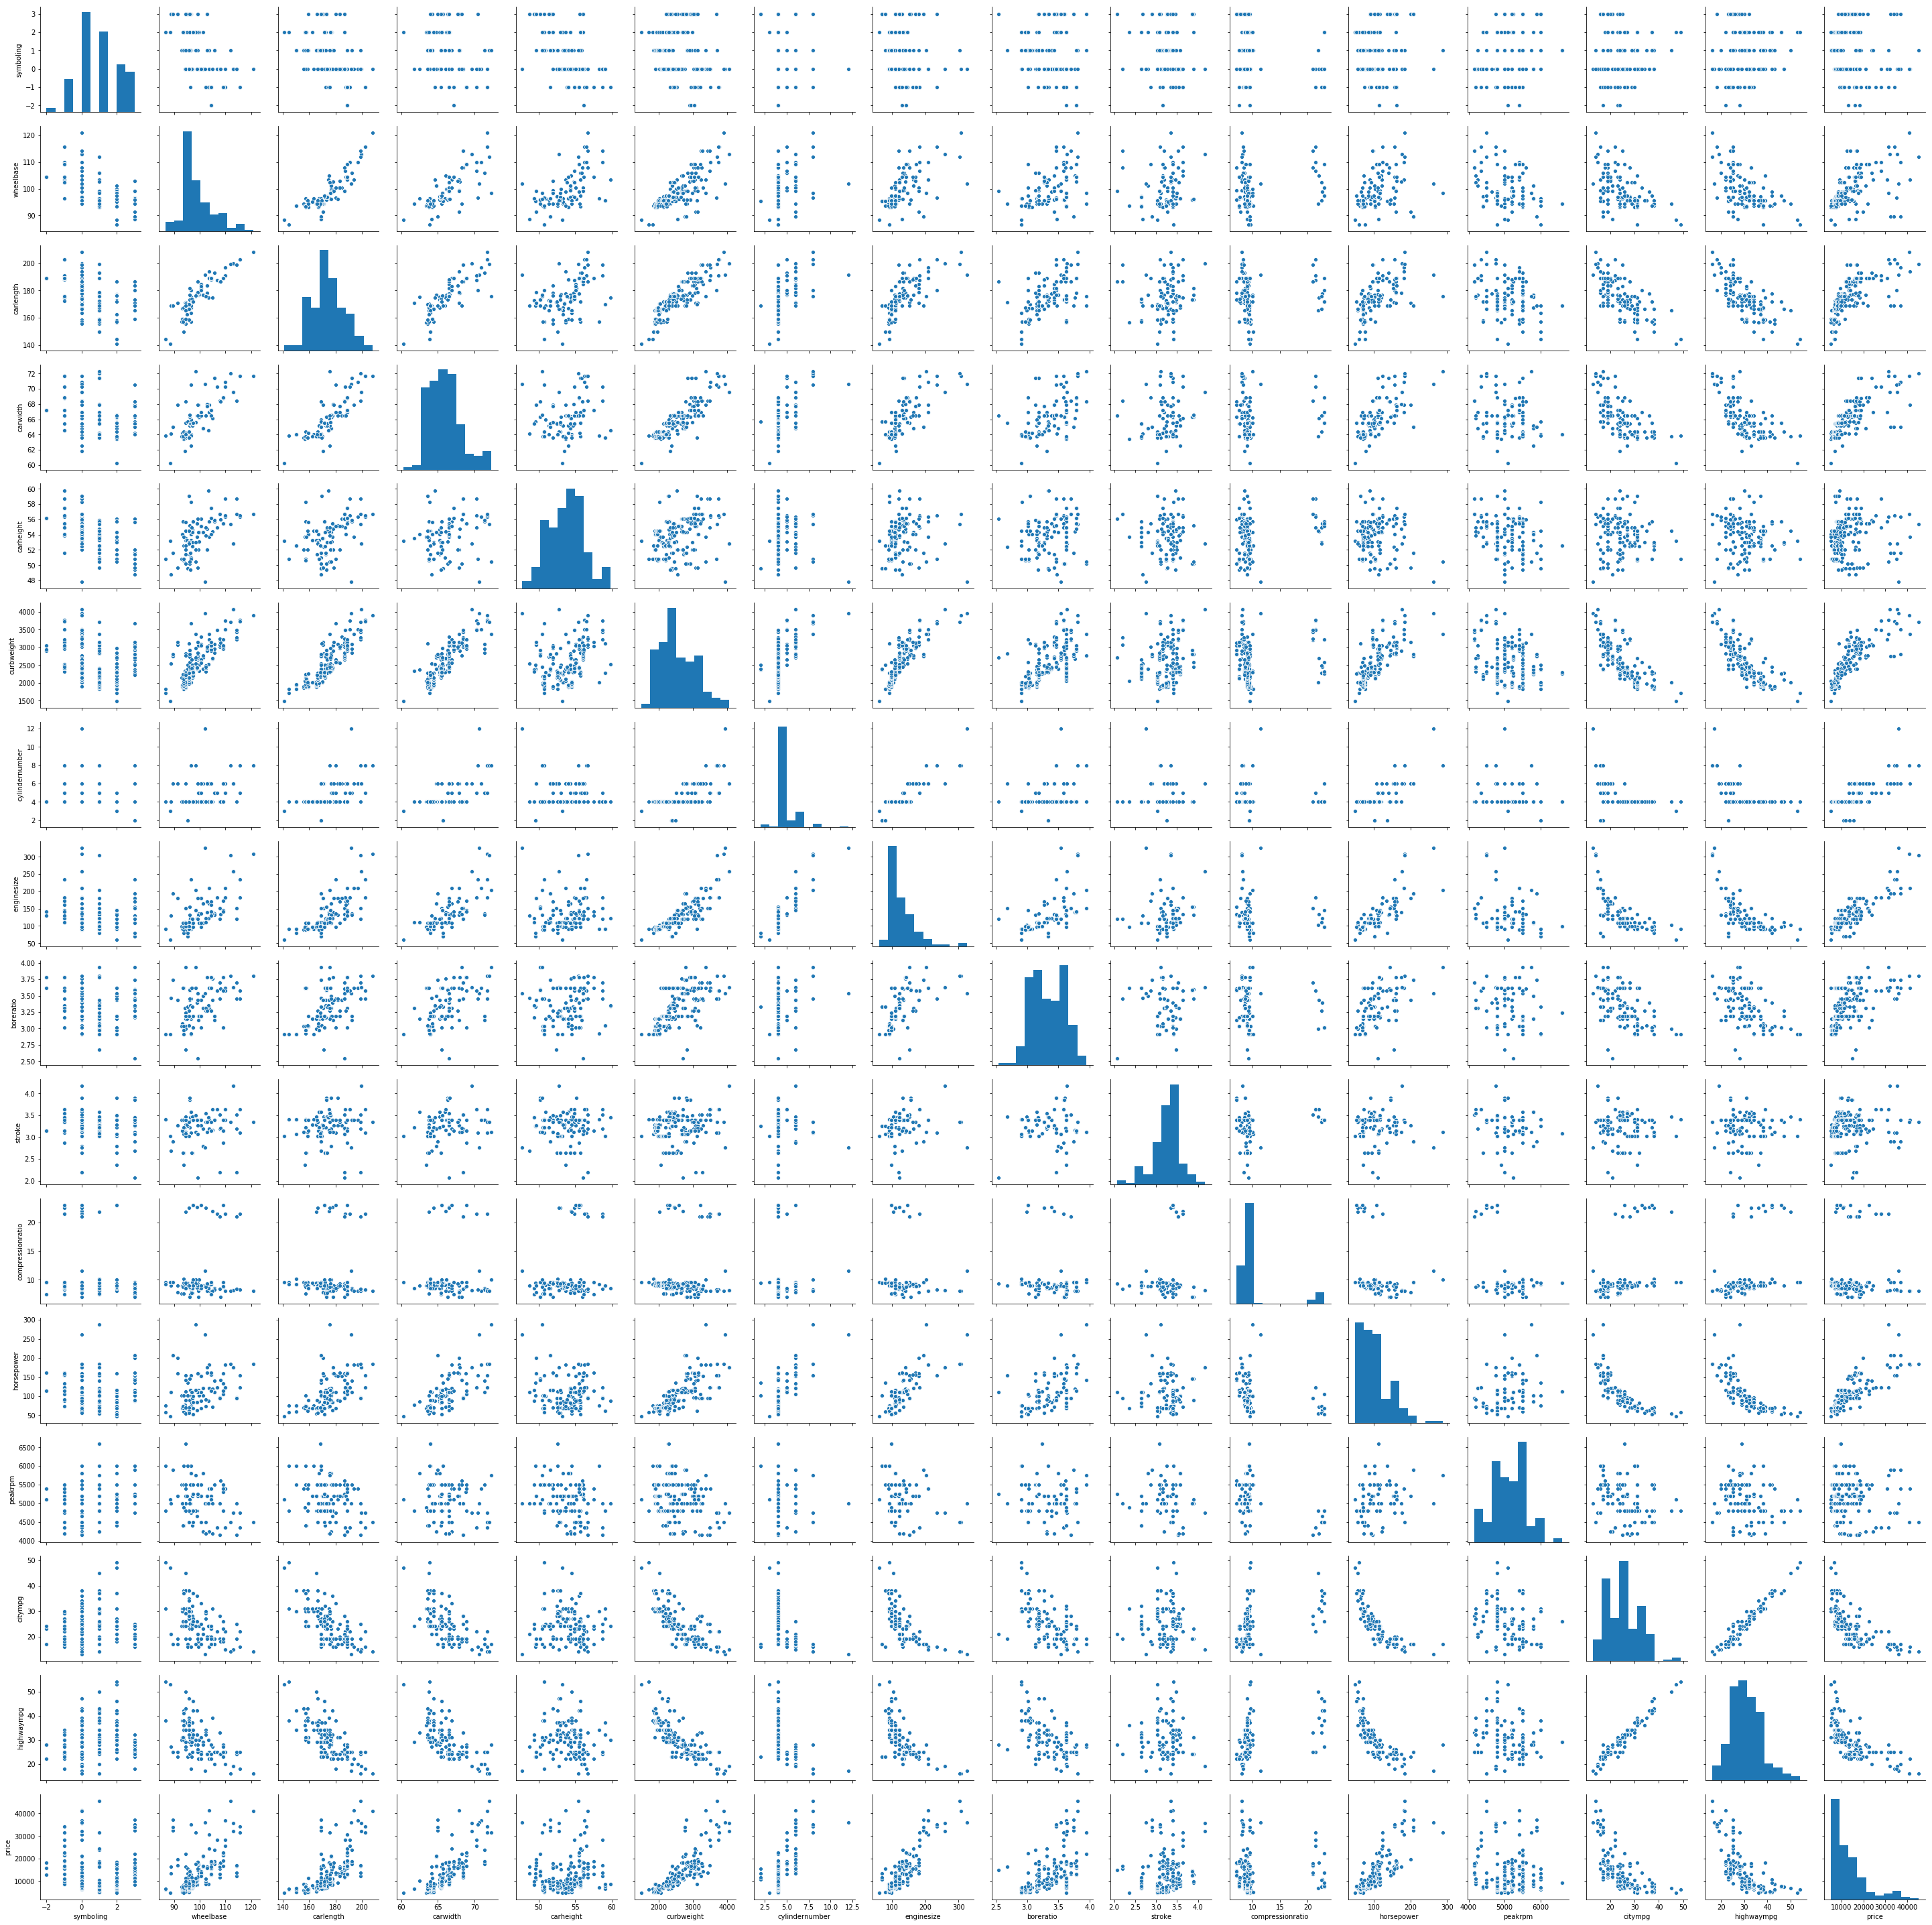

In [118]:
sns.pairplot(data=car_df[car_numeric])
plt.show()

### Visualising Categorical Variables


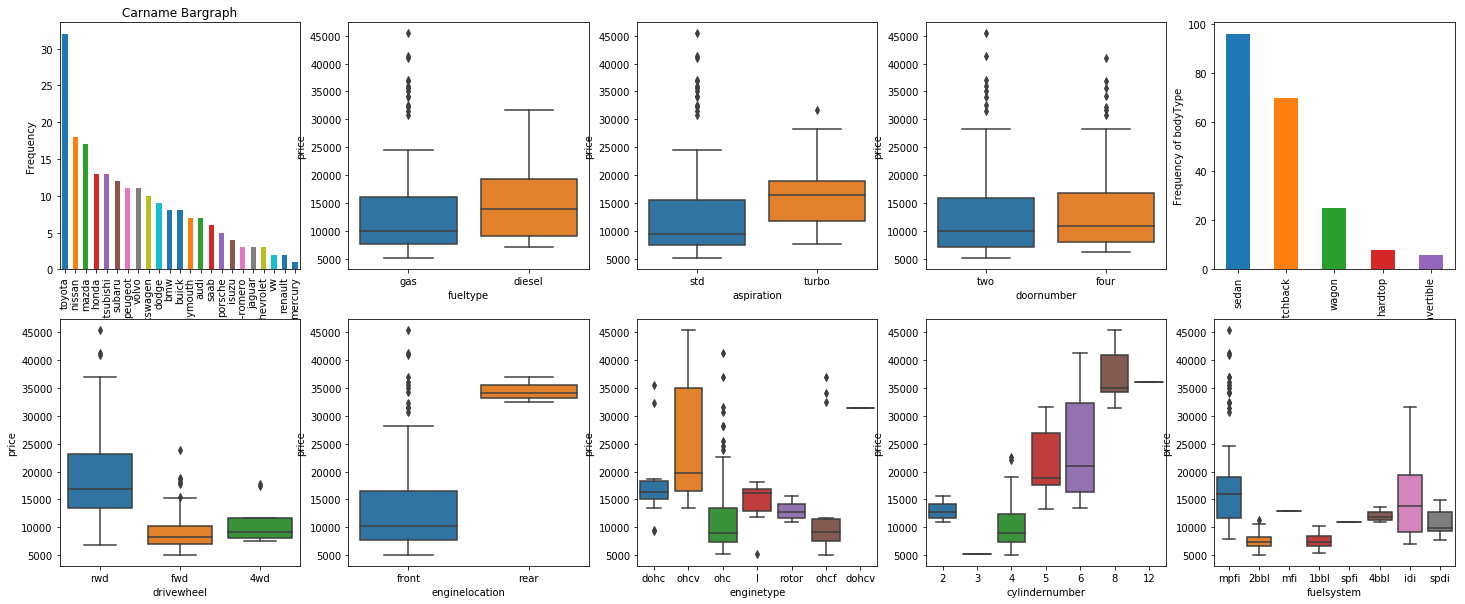

In [119]:
plt.figure(figsize=(25, 10))

plt.subplot(2,5,1)
plt1 = car_df.CarName.value_counts().plot('bar')
plt.title('Carname Bargraph')
plt1.set(xlabel = 'Car_Name company', ylabel='Frequency')

plt.subplot(2,5,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)

plt.subplot(2,5,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)

plt.subplot(2,5,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)

plt.subplot(2,5,5)
plt1 = car_df.carbody.value_counts().plot('bar')
plt1.set(xlabel = 'carbody', ylabel='Frequency of bodyType')

plt.subplot(2,5,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)

plt.subplot(2,5,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)

plt.subplot(2,5,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)

plt.subplot(2,5,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)

plt.subplot(2,5,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
plt.show()

# Step 3: Data Preparation

In [120]:
## converting car name company as per there brand value from 0-4 in ascending order.

def branding(x):
    if x == 'chevrolet':
        return 0
    elif x in ['dodge', 'plymouth', 'honda', 
             'subaru', 'isuzu', 'mitsubishi', 'renault', 
             'toyota', 'volkswagen', 'nissan', 'mazda', 'vw']:
        return 1
    elif x in ['saab', 'peugeot', 'alfa-romero', 'mercury',
                 'audi', 'volvo']:
        return 2
    elif x == 'bmw':
        return 3
    elif x in ['porsche', 'buick', 'jaguar']:
        return 4
    else:
        raise Exception('car brand not found %s' % (x))
        
car_df['CarName'] = car_df['CarName'].transform(branding)

In [122]:
# creating dummy cols for categorical variables
car_dummies = pd.get_dummies(car_df, columns=car_categorical, drop_first=True, sparse=True)

In [123]:
car_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
symboling              205 non-null int64
CarName                205 non-null int64
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
cylindernumber         205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
fueltype_gas           205 non-null uint8
aspiration_turbo       205 non-null uint8
doornumber_two         205 non-null uint8
carbody_hardtop        205 non-null uin

# Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [126]:
np.random.seed(0)
car_train, car_test = train_test_split(car_dummies, train_size = 0.7, test_size = 0.3, random_state = 100)

In [127]:
car_train.describe()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.797203,1.468531,98.523077,173.416783,65.839860,53.551748,2539.510490,4.405594,124.958042,3.307413,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.195999,0.917776,5.961835,12.598122,2.214203,2.433766,544.650539,1.158178,40.974034,0.260997,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.680000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,1.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,4.000000,97.000000,3.065000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,1.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,4.000000,110.000000,3.310000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.000000,2.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,4.000000,141.000000,3.540000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,3.000000,4.000000,115.600000,202.600000,72.300000,59.100000,4066.000000,12.000000,326.000000,3.940000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [128]:
car_train.head()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1,1,93.7,167.3,63.8,50.8,2191,4,98,2.97,...,0,0,0,1,0,0,0,0,0,0
125,3,4,94.5,168.9,68.3,50.2,2778,4,151,3.94,...,0,0,0,0,0,0,0,1,0,0
166,1,1,94.5,168.7,64.0,52.6,2300,4,98,3.24,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
199,-1,2,104.3,188.8,67.2,57.5,3157,4,130,3.62,...,0,0,0,0,0,0,0,1,0,0


In [129]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 40 columns):
symboling              143 non-null int64
CarName                143 non-null int64
wheelbase              143 non-null float64
carlength              143 non-null float64
carwidth               143 non-null float64
carheight              143 non-null float64
curbweight             143 non-null int64
cylindernumber         143 non-null int64
enginesize             143 non-null int64
boreratio              143 non-null float64
stroke                 143 non-null float64
compressionratio       143 non-null float64
horsepower             143 non-null int64
peakrpm                143 non-null int64
citympg                143 non-null int64
highwaympg             143 non-null int64
price                  143 non-null float64
fueltype_gas           143 non-null uint8
aspiration_turbo       143 non-null uint8
doornumber_two         143 non-null uint8
carbody_hardtop        143 non-null uin

### Rescaling the feature

In [130]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
car_train[car_numeric] = scaler.fit_transform(car_train[car_numeric])

In [131]:
car_train.head()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.25,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1.00,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.25,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.50,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.50,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


In [136]:
car_train.shape

(143, 40)

In [158]:
car_train.describe()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.367133,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.239200,0.229444,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.250000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.600000,0.250000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.600000,0.500000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


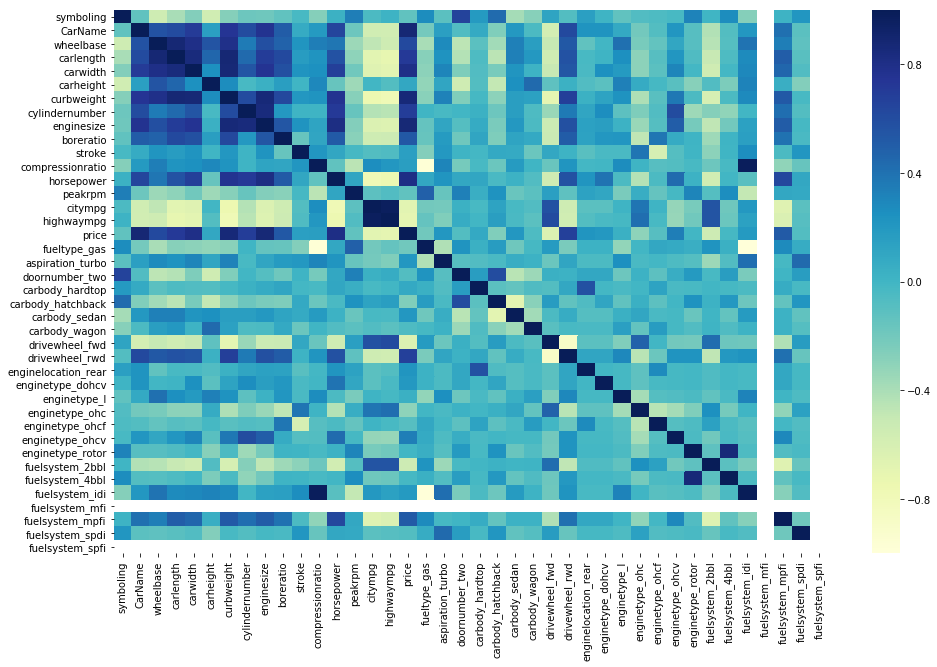

In [137]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_train.corr(), annot = False, cmap="YlGnBu")
plt.show()

## Dividing into X and Y sets for the model building

In [ ]:
y_train = car_train.pop('price')
X_train = car_train

In [173]:
X_train.shape

(143, 39)

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [204]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [205]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 4),
 ('CarName', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 3),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 9),
 ('doornumber_two', False, 11),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 10),
 ('drivewheel_rwd', False, 2),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 8),
 ('enginetype_l', False, 12),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 13),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 6),
 ('fuelsystem_4bbl', False, 5),
 ('fuelsystem_idi', True, 

In [208]:
col = X_train.columns[rfe.support_]
col

Index(['CarName', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_gas', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_rotor', 'fuelsystem_idi',
       'fuelsystem_spdi'],
      dtype='object')

In [209]:
X_train.columns[~rfe.support_]

Index(['symboling', 'carheight', 'aspiration_turbo', 'doornumber_two',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spfi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [210]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,CarName,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,enginetype_ohc,enginetype_ohcf,enginetype_rotor,fuelsystem_idi,fuelsystem_spdi
122,0.25,0.244828,0.426016,0.291667,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,1,0,0,0,0
125,1.00,0.272414,0.452033,0.666667,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,...,0,1,0,0,0,1,0,0,0,0
166,0.25,0.272414,0.448780,0.308333,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,...,0,1,0,0,0,0,0,0,0,0
1,0.50,0.068966,0.450407,0.316667,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.50,0.610345,0.775610,0.575000,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,...,0,0,0,1,0,1,0,0,0,0


In [211]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## Model 1 

In [212]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     75.04
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.77e-60
Time:                        15:20:21   Log-Likelihood:                 216.35
No. Observations:                 143   AIC:                            -382.7
Df Residuals:                     118   BIC:                            -308.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0533    

In [213]:
checkVIF(X_train_rfe)

,Features,VIF
14,fueltype_gas,316.70
23,fuelsystem_idi,128.76
9,compressionratio,91.26
6,enginesize,47.76
12,citympg,33.15
13,highwaympg,32.49
4,curbweight,29.59
5,cylindernumber,28.03
17,carbody_sedan,18.59
16,carbody_hatchback,15.39


In [214]:
X_train_new = X_train_rfe.drop(["fueltype_gas"], axis = 1)

## Model 2

In [215]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     75.04
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.77e-60
Time:                        15:21:12   Log-Likelihood:                 216.35
No. Observations:                 143   AIC:                            -382.7
Df Residuals:                     118   BIC:                            -308.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0829    

In [216]:
checkVIF(X_train_new)

,Features,VIF
0,const,348.37
23,fuelsystem_idi,93.27
10,compressionratio,91.26
7,enginesize,47.76
13,citympg,33.15
14,highwaympg,32.49
5,curbweight,29.59
6,cylindernumber,28.03
17,carbody_sedan,18.59
16,carbody_hatchback,15.39


In [217]:
X_train_new = X_train_new.drop(["fuelsystem_idi"], axis = 1)

## Model 3

In [218]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     76.28
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.84e-60
Time:                        15:22:01   Log-Likelihood:                 214.03
No. Observations:                 143   AIC:                            -380.1
Df Residuals:                     119   BIC:                            -308.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0741    

In [219]:
checkVIF(X_train_new)

,Features,VIF
0,const,347.56
7,enginesize,47.76
13,citympg,33.10
14,highwaympg,31.99
5,curbweight,28.87
6,cylindernumber,25.76
17,carbody_sedan,18.59
16,carbody_hatchback,15.35
3,carlength,13.73
11,horsepower,12.32


In [220]:
X_train_new = X_train_new.drop(["carlength"], axis = 1)

## Model 4

In [222]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     80.41
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.12e-61
Time:                        15:22:51   Log-Likelihood:                 214.03
No. Observations:                 143   AIC:                            -382.1
Df Residuals:                     120   BIC:                            -313.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0732    

In [225]:
#checkVIF(X_train_new)

In [226]:
X_train_new = X_train_new.drop(["compressionratio"], axis = 1)

In [227]:
#Model 5
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     84.87
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.50e-62
Time:                        15:24:10   Log-Likelihood:                 213.97
No. Observations:                 143   AIC:                            -383.9
Df Residuals:                     121   BIC:                            -318.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0856    

In [228]:
X_train_new = X_train_new.drop(["highwaympg"], axis = 1)

In [229]:
#Model 6
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     89.66
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           4.09e-63
Time:                        15:24:31   Log-Likelihood:                 213.83
No. Observations:                 143   AIC:                            -385.7
Df Residuals:                     122   BIC:                            -323.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0809    

In [230]:
X_train_new = X_train_new.drop(["peakrpm"], axis = 1)

In [231]:
#Model 7
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     94.77
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           5.21e-64
Time:                        15:25:27   Log-Likelihood:                 213.56
No. Observations:                 143   AIC:                            -387.1
Df Residuals:                     123   BIC:                            -327.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0564    

In [232]:
checkVIF(X_train_new)

,Features,VIF
0,const,187.00
6,enginesize,41.61
5,cylindernumber,23.09
4,curbweight,19.31
13,carbody_sedan,16.92
12,carbody_hatchback,14.59
9,horsepower,9.82
14,carbody_wagon,8.74
7,boreratio,7.72
3,carwidth,7.65


In [233]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)

In [234]:
#Model 8
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     90.40
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.69e-62
Time:                        15:26:47   Log-Likelihood:                 206.26
No. Observations:                 143   AIC:                            -374.5
Df Residuals:                     124   BIC:                            -318.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2186    

In [235]:
checkVIF(X_train_new)

,Features,VIF
0,const,104.10
12,carbody_sedan,16.22
4,curbweight,15.21
11,carbody_hatchback,14.04
8,horsepower,9.77
13,carbody_wagon,7.97
2,wheelbase,7.47
3,carwidth,6.67
5,cylindernumber,5.30
9,citympg,4.34


In [236]:
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

In [237]:
#Model 9
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     96.44
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.77e-63
Time:                        15:28:21   Log-Likelihood:                 206.23
No. Observations:                 143   AIC:                            -376.5
Df Residuals:                     125   BIC:                            -323.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2187    

In [238]:
checkVIF(X_train_new)

,Features,VIF
0,const,104.09
11,carbody_sedan,15.80
3,curbweight,14.77
10,carbody_hatchback,13.82
7,horsepower,9.10
12,carbody_wagon,7.65
2,wheelbase,5.83
4,cylindernumber,5.27
8,citympg,4.31
5,boreratio,3.76


In [239]:
X_train_new = X_train_new.drop(["carbody_sedan","curbweight","carbody_hatchback"], axis = 1)

In [241]:
#Model 10
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     86.17
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           5.05e-58
Time:                        15:29:43   Log-Likelihood:                 184.56
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     128   BIC:                            -294.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2861    

In [242]:
checkVIF(X_train_new)

,Features,VIF
0,const,89.16
6,horsepower,7.79
3,cylindernumber,4.77
7,citympg,3.65
4,boreratio,3.29
1,CarName,3.09
12,enginetype_ohcf,2.56
2,wheelbase,2.54
11,enginetype_ohc,2.42
5,stroke,1.99


In [243]:
X_train_new = X_train_new.drop(["horsepower","boreratio","stroke","carbody_wagon","enginetype_ohcf"], axis = 1)

In [244]:
#Model 11
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.88e-56
Time:                        15:31:35   Log-Likelihood:                 166.93
No. Observations:                 143   AIC:                            -313.9
Df Residuals:                     133   BIC:                            -284.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1400    

In [245]:
X_train_new = X_train_new.drop(["carbody_hardtop","enginetype_ohc","fuelsystem_spdi"], axis = 1)


In [246]:
#Model 12
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.97e-59
Time:                        15:33:27   Log-Likelihood:                 166.57
No. Observations:                 143   AIC:                            -319.1
Df Residuals:                     136   BIC:                            -298.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1256    

In [247]:
X_train_new = X_train_new.drop(["citympg"], axis = 1)


In [248]:
#Model 12
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.62e-58
Time:                        15:34:10   Log-Likelihood:                 161.47
No. Observations:                 143   AIC:                            -310.9
Df Residuals:                     137   BIC:                            -293.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2261    

In [249]:
checkVIF(X_train_new)

,Features,VIF
0,const,8.24
1,CarName,2.37
3,cylindernumber,1.86
2,wheelbase,1.64
4,enginelocation_rear,1.18
5,enginetype_rotor,1.18


## Residual Analysis

Text(0.5, 0, 'Errors')

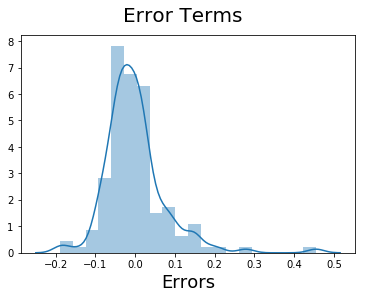

In [259]:
y_train_price = lm.predict(X_train_new)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions Using the Final Model

In [260]:
# Scaling the test set with scaler from the training set
car_test[car_numeric] = scaler.transform(car_test[car_numeric])

In [261]:
# Creating X and Y variables
y_test = car_test.pop('price')
X_test = car_test

In [263]:
X_test.head()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,0.25,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,...,0,0,0,1,0,0,0,0,0,0
186,0.8,0.25,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,...,0,0,0,0,0,0,0,1,0,0
59,0.6,0.25,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,...,0,0,0,1,0,0,0,0,0,0
165,0.6,0.25,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
140,0.8,0.25,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,...,1,0,0,1,0,0,0,0,0,0


In [264]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [265]:
# Making predictions using the last model

# Making predictions
y_pred = lm.predict(X_test_new)

In [266]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8893125608676087

# Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

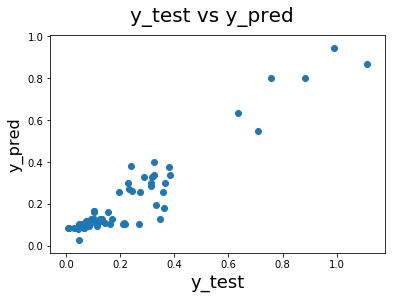

In [269]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [270]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.62e-58
Time:                        16:37:01   Log-Likelihood:                 161.47
No. Observations:                 143   AIC:                            -310.9
Df Residuals:                     137   BIC:                            -293.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2261    

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.868 and 0.863 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 179.4 and 2.62e-58(approx. 0.0) - Model fit is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.